## Build a Content-based recommender for wine

In [1]:
# Import Dependencies
import os
import csv

import pandas as pd
import numpy as np


## Raw data import


In [2]:
#raw data import
wine1 = "wine_data1.csv"
wine1_input = pd.read_csv(wine1, low_memory=False)
wine1_input = pd.DataFrame(wine1_input)

wine1_input
#wine1_input.columns
#wine1_input.count()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [3]:
wine1_input.count()

Unnamed: 0     150930
country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
region_2        60953
variety        150930
winery         150930
dtype: int64

# View primary categories to get undertanding of shape/ range of data

In [5]:
#find max/ min for price and points to get range
wine1_input.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [6]:
wine1_input.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [7]:
# create new df to visually see price/ points distribution
wine_rating = pd.DataFrame(wine1_input.groupby('points')['price'].mean())
wine_rating

,price
points,
80,17.224236
81,17.665078
82,19.171879
83,18.013604
84,19.367885
85,20.055067
86,21.816528
87,24.588279
88,27.831296


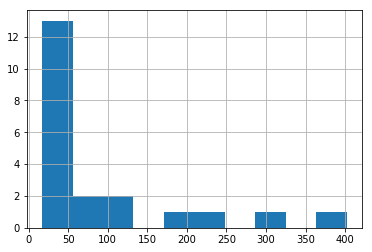

In [8]:
#visualize distribution of price and points

import matplotlib.pyplot as plt
%matplotlib inline
wine_rating['price'].hist(bins=10)

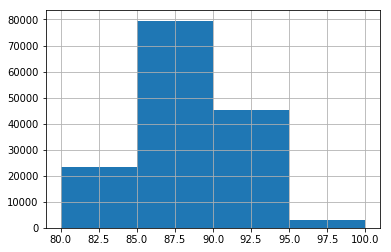

In [9]:
%matplotlib inline
wine1_input['points'].hist(bins=4)

In [ ]:
#limit the number of wine varieties for clustering to those that have at least 1000 reviews under that variety

wine_variety =wine1_input.groupby('variety').filter(lambda x: len(x) > 1000)
varieties = wine_variety['variety'].value_counts()

In [ ]:
#wine_variety["variety"].unique()
wine_variety["variety"].nunique()

In [ ]:
wine_variety.head()
wine_variety = pd.DataFrame(wine_variety)
wine_variety.count()

In [ ]:
#see how many wine varieties there are
wine1_input['variety'].value_counts()
#wine1_input['variety'].nunique()

In [ ]:
#wine_variety.head()
wine_variety.count()

In [ ]:
#export cleaned data to use in zepl
wine_variety.to_csv("wineClean.csv", index=False, header=True)

Phase 2

In [ ]:
#limit the number of wine varieties for clustering to those that have at least 1000 reviews under that variety

wine_variety =wine1_input.groupby('variety').filter(lambda x: len(x) > 1000)
varieties = wine_variety['variety'].value_counts()


In [ ]:
#some top items are too similiar; rename so they fall under the same variety name
wine1_input["variety"] = wine1_input["variety"].replace({'Bordeaux-style Red Blend': 'Red Blend', 'Rhône-style Red Blend': 'Red Blend', "Champagne Blend": "Sparkling", "Sparkling Blend": "Sparkling"})
wine1_input


In [ ]:
#limit the number of wine reviews for clustering to wines that have a point rating of 90 or more 
best_wines = wine_variety.query('points > 90')
best_wines

In [ ]:
best_wines.count()

In [ ]:
best_wines = pd.DataFrame(best_wines)
best_wines.head()

In [ ]:
best_wines.to_csv("bestWines.csv", index=False, header=True )

Code below used in zepl; change order of columns directly in csv before uploading to awsS3
<variety, description,... etc.>

In [ ]:
%pyspark
import pyspark
from pyspark import SparkFiles

# Read in data from S3 Buckets, Phase1

wine1_url = "https://virtual-bartender-uci-final-project.s3-us-west-1.amazonaws.com/wineClean.csv"
spark.sparkContext.addFile(wine1_url)
wine1 = spark.read.csv(SparkFiles.get("wineClean.csv"), sep=",", header=True)

# Show DataFrame
wine1.show(5)
# -----------------------------------------------------------------------

# Read in data from S3 Buckets, Phase2
wine1_url = "https://virtual-bartender-uci-final-project.s3-us-west-1.amazonaws.com/bestWines.csv"
spark.sparkContext.addFile(wine1_url)
wine1 = spark.read.csv(SparkFiles.get("bestWines.csv"), sep=",", header=True)

# Show DataFrame
wine1.show(5)


In [ ]:
%pyspark

#drop unneeded columns

drop_list = ["designation", "points", "price", "province", "region_1", "region_2","winery", "country"]
wine1 = wine1.select([column for column in wine1.columns if column not in drop_list])
wine1.show(5)

In [ ]:
%pyspark
from pyspark.sql.functions import length
# Create a length column to be used as a future feature 
wine_df = wine1.withColumn('length', length(wine1['description']))
wine_df.show()

In [ ]:
%pyspark
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF, StringIndexer
# Create all the features to the data set

indexer = StringIndexer(inputCol="variety", outputCol="label")

tokenizer = Tokenizer(inputCol="description", outputCol="token_text")

stopremove = StopWordsRemover(inputCol="token_text",outputCol="stop_tokens")

hashingTF = HashingTF(inputCol="token_text", outputCol='hash_token')

idf = IDF(inputCol='hash_token', outputCol='idf_token')

In [ ]:
%pyspark
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector

# Create feature vectors
clean_up = VectorAssembler(inputCols=['idf_token', 'length'], outputCol='features')

In [ ]:
%pyspark
# Create a and run a data processing Pipeline
from pyspark.ml import Pipeline
data_prep_pipeline = Pipeline(stages=[indexer, tokenizer, stopremove, hashingTF, idf, clean_up])

In [ ]:
%pyspark
# Fit and transform the pipeline
cleaner = data_prep_pipeline.fit(wine_df)
cleaned = cleaner.transform(wine_df)

In [ ]:
%pyspark
# Show label and resulting features
cleaned.select(['label', 'features']).show()

In [ ]:
%pyspark
from pyspark.ml.classification import NaiveBayes
# Break data down into a training set and a testing set
training, testing = cleaned.randomSplit([0.8, 0.2])

# Create a Naive Bayes model and fit training data
nb = NaiveBayes()
predictor = nb.fit(training)

In [ ]:
%pyspark
# Tranform the model with the testing data
test_results = predictor.transform(testing)
test_results.show(5)

In [ ]:
%pyspark
# Use the Class Evaluator for a cleaner description
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

acc_eval = MulticlassClassificationEvaluator()
acc = acc_eval.evaluate(test_results)
print("Accuracy of model at predicting wine variety was: %f" % acc)

Code for mongo db when/ if needed

In [ ]:
#output recipe for random drink

#chnge df to mongodb?

from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/')
db = client.test
collection = db.collection
drink_recipe = collection.insert_many(drink1_input.to_dict('records'))

pprint(list(collection.find()))

In [ ]:
#drink2 = "hotaling_cocktails.csv"
#drink2_input = pd.read_csv(drink2, low_memory=False)
#drink2_input